# Expediciones al Himalaya

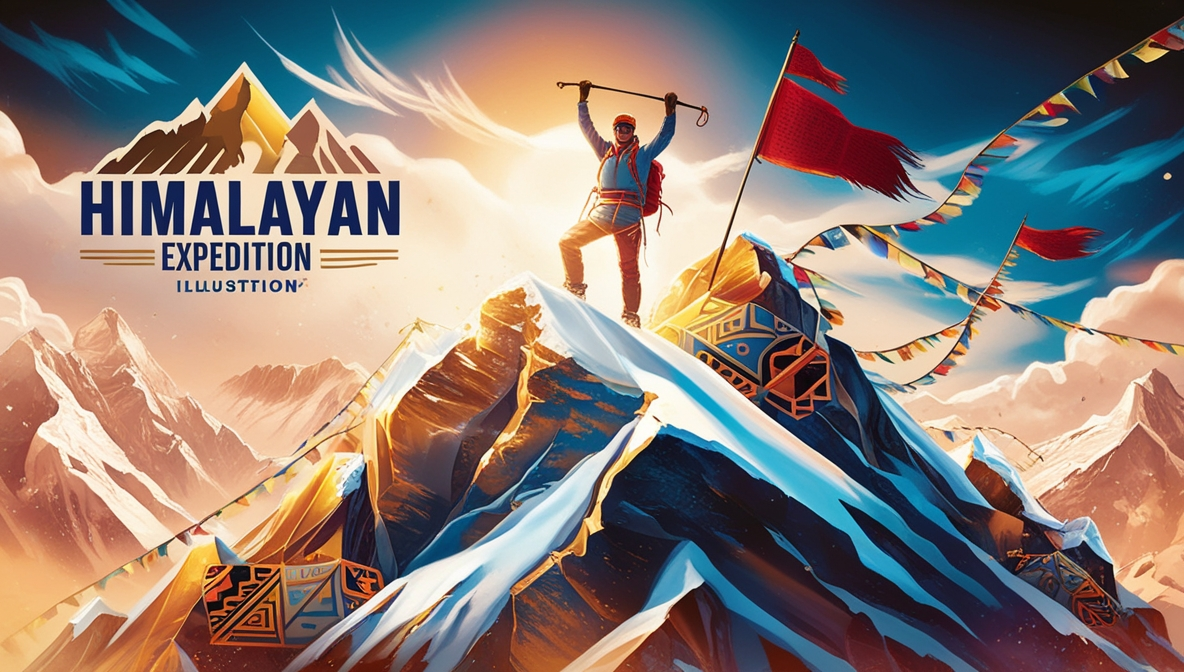

### Presentación de variables

**expedition_id** : Identificación única de la expedición.  

**peak_id** : Identificación única del pico de la montaña.  

**peak_name** : Nombre del pico de la montaña.  

**year** : Año en el que se llevó a cabo la expedición.  

**season** : Estación del año en la que se llevó a cabo la expedición.  

**basecamp_date** : Fecha en la que la expedición llegó al campamento base. Punto de partida para el ascenso.  

**highpoint_date** : Fecha en la que la expedición alcanzó su punto más alto, puede no ser la cumbre del pico.  

**termination_date** : Fecha en la que la expedición terminó.  

**termination_reason** : Razón por la que la expedición terminó.  

**highpoint_metres** :  Altura en metros, del punto más alto alcanzado por la expedición.  

**members** : Número total de miembros de la expedición.  

**member_deaths** : Número de miembros que fallecierón durante la expedición.  

**hired_staff** :  Número del personal contratado por la expedición, como guías y porteadores.  

**hired_staff_deaths** : Número de personal contratado que falleció durante la expedición.  

**oxygen_used** : Indica si usó oxígeno suplementario durante la expedición.  

**trekking_agency** : Nombre de la agencia de trekking que organizó la expedición.

### 1. Empezamos con la lectura y preprocesamiento de datos.

In [114]:
# Importamos librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
import ipywidgets as widgets

In [115]:
# Cargamos el dataset
expeditions = pd.read_csv('expeditions.csv')

### 1.1 Visualizamos el dataset expeditions

In [116]:
expeditions

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10359,PUMO19101,PUMO,Pumori,2019,Spring,2019-04-04,2019-05-01,2019-05-27,Success (main peak),7138.0,8,0,4,0,False,Mountain Experience
10360,PUMO19102,PUMO,Pumori,2019,Spring,2019-04-14,2019-05-01,2019-05-25,Success (main peak),7138.0,1,0,1,0,False,Asian Trekking
10361,PUTH19101,PUTH,Putha Hiunchuli,2019,Spring,2019-05-09,2019-05-16,2019-05-17,"Bad conditions (deep snow, avalanching, fallin...",6350.0,5,0,2,0,False,Iceland Trekking
10362,RATC19101,RATC,Ratna Chuli,2019,Spring,2019-04-11,2019-04-19,2019-05-03,Lack (or loss) of supplies or equipment,6600.0,1,0,0,0,False,Pioneer Adventure


In [117]:
# Observamos el tamaño del dataframe
expeditions.shape


(10364, 16)

In [118]:
# Vemos la información general
expeditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364 entries, 0 to 10363
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   expedition_id       10364 non-null  object 
 1   peak_id             10364 non-null  object 
 2   peak_name           10363 non-null  object 
 3   year                10364 non-null  int64  
 4   season              10364 non-null  object 
 5   basecamp_date       9269 non-null   object 
 6   highpoint_date      9714 non-null   object 
 7   termination_date    7984 non-null   object 
 8   termination_reason  10364 non-null  object 
 9   highpoint_metres    9950 non-null   float64
 10  members             10364 non-null  int64  
 11  member_deaths       10364 non-null  int64  
 12  hired_staff         10364 non-null  int64  
 13  hired_staff_deaths  10364 non-null  int64  
 14  oxygen_used         10364 non-null  bool   
 15  trekking_agency     8654 non-null   object 
dtypes: b

In [119]:
# Vemos nulos y graficamos
expeditions.isnull().sum()

expedition_id            0
peak_id                  0
peak_name                1
year                     0
season                   0
basecamp_date         1095
highpoint_date         650
termination_date      2380
termination_reason       0
highpoint_metres       414
members                  0
member_deaths            0
hired_staff              0
hired_staff_deaths       0
oxygen_used              0
trekking_agency       1710
dtype: int64

<Axes: >

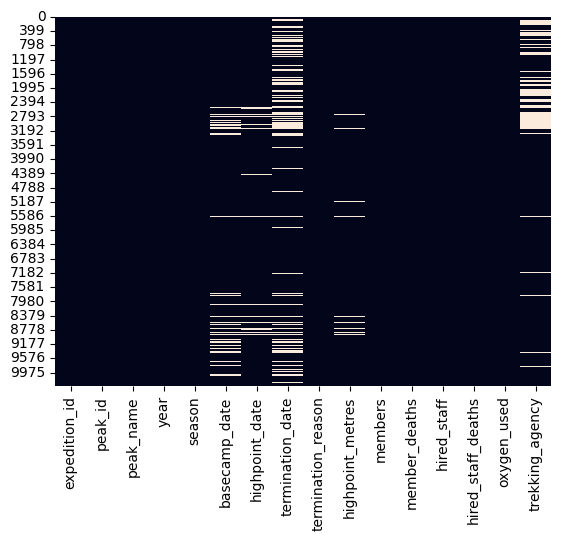

In [120]:
# Graficamos valores nulos
sns.heatmap(expeditions.isnull(), cbar=False)

In [121]:
# Analizamos las variables numéricas
expeditions.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10364.0,2001.156310,14.710054,1905.0,1994.0,2005.0,2012.0,2019.0
highpoint_metres,9950.0,7408.923819,1012.628339,3500.0,6700.0,7300.0,8188.0,8850.0
members,10364.0,5.953300,5.428004,0.0,2.0,5.0,8.0,99.0
member_deaths,10364.0,0.076032,0.377665,0.0,0.0,0.0,0.0,10.0
hired_staff,10364.0,2.776920,5.081277,0.0,0.0,1.0,3.0,99.0
hired_staff_deaths,10364.0,0.030683,0.284747,0.0,0.0,0.0,0.0,11.0


### 2. Tratamiento de las variables

In [122]:
# Volvemos a visualizar los tipos para sabes qué columnas cambiar o eliminar
expeditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364 entries, 0 to 10363
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   expedition_id       10364 non-null  object 
 1   peak_id             10364 non-null  object 
 2   peak_name           10363 non-null  object 
 3   year                10364 non-null  int64  
 4   season              10364 non-null  object 
 5   basecamp_date       9269 non-null   object 
 6   highpoint_date      9714 non-null   object 
 7   termination_date    7984 non-null   object 
 8   termination_reason  10364 non-null  object 
 9   highpoint_metres    9950 non-null   float64
 10  members             10364 non-null  int64  
 11  member_deaths       10364 non-null  int64  
 12  hired_staff         10364 non-null  int64  
 13  hired_staff_deaths  10364 non-null  int64  
 14  oxygen_used         10364 non-null  bool   
 15  trekking_agency     8654 non-null   object 
dtypes: b

In [123]:
# Vemos el listado del nombre de las columnas
expeditions.columns

Index(['expedition_id', 'peak_id', 'peak_name', 'year', 'season',
       'basecamp_date', 'highpoint_date', 'termination_date',
       'termination_reason', 'highpoint_metres', 'members', 'member_deaths',
       'hired_staff', 'hired_staff_deaths', 'oxygen_used', 'trekking_agency'],
      dtype='object')

### 2.1. Convertimos tipos de variables

In [124]:
# Renombramos los valores de la columna oxygen_used para que sea más visual y le cambiamos el tipo
expeditions['oxygen_used'] = expeditions['oxygen_used'].replace({False : 'No',True: 'Yes' }).astype(str)

### 2.2 Eliminamos columnas con NAN para mejor legibilidad

In [125]:
expeditions.drop(['basecamp_date','highpoint_date','termination_date','trekking_agency'], axis=1, inplace=True)

In [126]:
# Comprobamos el tipo de nuestras variables
expeditions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364 entries, 0 to 10363
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   expedition_id       10364 non-null  object 
 1   peak_id             10364 non-null  object 
 2   peak_name           10363 non-null  object 
 3   year                10364 non-null  int64  
 4   season              10364 non-null  object 
 5   termination_reason  10364 non-null  object 
 6   highpoint_metres    9950 non-null   float64
 7   members             10364 non-null  int64  
 8   member_deaths       10364 non-null  int64  
 9   hired_staff         10364 non-null  int64  
 10  hired_staff_deaths  10364 non-null  int64  
 11  oxygen_used         10364 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 971.8+ KB


In [127]:
expeditions.isnull().sum()

expedition_id           0
peak_id                 0
peak_name               1
year                    0
season                  0
termination_reason      0
highpoint_metres      414
members                 0
member_deaths           0
hired_staff             0
hired_staff_deaths      0
oxygen_used             0
dtype: int64

### 2.3 Eliminamos los valores nulos de las columnas con dichos valores

In [128]:
# Utilizamos la funcion para eliminar valores nulos
def quitar_nulos (df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

expeditions = quitar_nulos (expeditions)

In [129]:
# Comprobamos valores nulos de nuevo.
expeditions.isnull().sum()

expedition_id         0
peak_id               0
peak_name             0
year                  0
season                0
termination_reason    0
highpoint_metres      0
members               0
member_deaths         0
hired_staff           0
hired_staff_deaths    0
oxygen_used           0
dtype: int64

In [130]:
# Nos molestaban dos filas con valores Unknown por lo que hemos decidido eliminarlas 
expeditions.drop([2722, 2993], axis=0, inplace=True)

In [131]:
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers de expeditions usando el método IQR.
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

columnas_a_limpiar = ['highpoint_metres'] 
df_limpio = reemplazar_outliers_iqr(expeditions, columnas_a_limpiar)

### 3. EDA

### Relación de metros alcanzados por las expediciones según la estación del año

C:\Users\Alberto\AppData\Local\Temp\ipykernel_18588\4039422637.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='season', ylabel='highpoint_metres'>

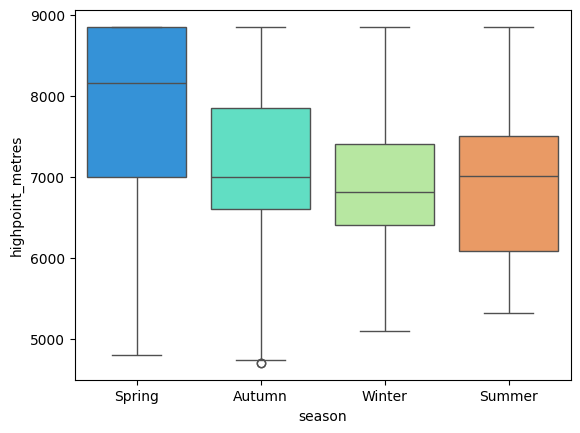

In [132]:
sns.boxplot(x="season", y="highpoint_metres", data=expeditions,palette='rainbow')

### Relación de metros alcanzados por las expediciones según la estación del año y si usaron o no oxígeno.

<Axes: xlabel='season', ylabel='highpoint_metres'>

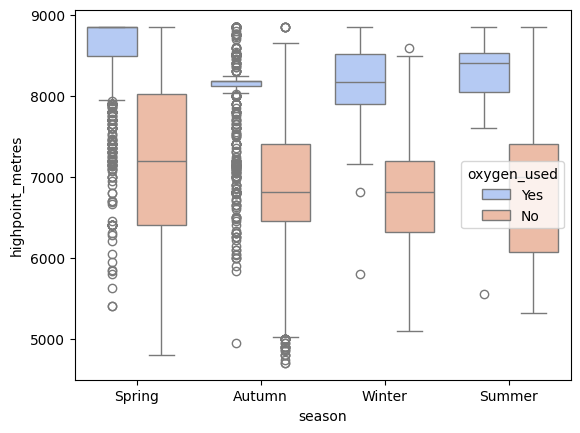

In [133]:
sns.boxplot(x="season", y="highpoint_metres", hue="oxygen_used",data=expeditions, palette="coolwarm")

### Lo mismo pero con un gráfico de violines

<Axes: xlabel='season', ylabel='highpoint_metres'>

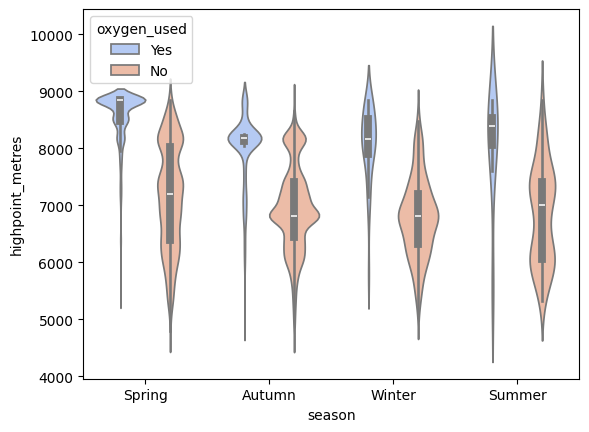

In [134]:
sns.violinplot(x="season", y="highpoint_metres", data=expeditions,hue='oxygen_used',palette='coolwarm')

### Razón de finalización de la expedición según estación y año

In [150]:
# Usamos plotly
fig = px.strip(expeditions, x="year", y="season", template="plotly_dark", color='termination_reason', title="Razón de finalización de la expedición según estación y año", )
fig.update_xaxes(tickangle=90)
fig.update_layout(height=600) 
fig.show()

### Media de miembros por expedición y por año

In [137]:
avg_members = expeditions.groupby('year')['members'].mean().reset_index()

fig = px.line(avg_members, x='year', y='members', 
              title='Media de miembros por expedición y por año', template="plotly_dark", color_discrete_sequence=['yellow'])

fig.show()


### Relación entre los miembros muertos por año y estación

In [138]:
fig = px.box(expeditions, x='member_deaths', y='year', 
             title='Relación entre los miembros muertos por año y estación', 
             
             template="plotly_dark", color='season') # añadimos color para diferenciar mejor los tamaños de empresa

fig.show()

### Distribución de picos por estación del año y miembros

In [153]:
picos_por_temporada = expeditions.groupby(['season', 'peak_name']).size().reset_index(name='Cantidad de miembros') 

fig = px.treemap(picos_por_temporada, path=['season', 'peak_name'], values='Cantidad de miembros', title='Distribución de picos por estación del año y miembros', template="plotly_dark")

fig.show()

### Cantidad de fallecidos en cada expedición según la estación y por pico

In [140]:
fallecidos = expeditions[(expeditions['member_deaths']>0) & (expeditions['member_deaths']<10)]
fig = px.scatter(fallecidos, x="peak_name", y="member_deaths", color="season",  log_x=False, size_max=80) 
fig.show()

### Top 10 Picos con mayor altitud alcanzada en expediciones

In [151]:
top10_picos = expeditions['peak_name'].value_counts()[:10].index.tolist()
fig = px.pie(expeditions[expeditions['peak_name'].isin(top10_picos)], 'peak_name', height=600 , title='Top 10 Picos con mayor altitud alcanzada en expediciones', template="plotly_dark")

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### Muertes por fechas y por estación 3D

In [142]:
fallecidos = expeditions[(expeditions['member_deaths']>0) & (expeditions['member_deaths']<10)]
fig = px.scatter_3d(fallecidos, x='year', y='season', z='member_deaths',
              color='season')
fig.show()

### Top 10 picos con más registro de muertes

In [154]:
# Estas son expediciones que usaron oxigeno
exp_oxygen= expeditions[expeditions['oxygen_used']=='Yes'].value_counts().head(10).sort_values(ascending= True)
exp_oxygen

expedition_id  peak_id  peak_name   year  season  termination_reason                                                            highpoint_metres  members  member_deaths  hired_staff  hired_staff_deaths  oxygen_used
AMAD00110      AMAD     Ama Dablam  2000  Spring  Bad weather (storms, high winds)                                              6280.0            8        0              3            0                   Yes            1
EVER89314      EVER     Everest     1989  Autumn  Success (main peak)                                                           8850.0            11       0              12           0                   Yes            1
EVER90102      EVER     Everest     1990  Spring  Illness, AMS, exhaustion, or frostbite                                        7800.0            13       0              6            0                   Yes            1
EVER90103      EVER     Everest     1990  Spring  Success (main peak)                                                        

In [156]:
top10_picos = expeditions.nlargest(10, 'member_deaths')
fig = px.pie(top10_picos, 
             values='member_deaths', 
             names='peak_name', 
             title='Top 10 Picos con Más Muertes')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.show()

### 50 expediciones con más miembros

In [158]:
# Calculamos las 50 expediciones con mas miembros
top50_expediciones_miembros = expeditions[expeditions['members']>30].nlargest(50,'members')
top50_expediciones_miembros
wide_df = px.data.medals_wide()
 
fig = px.bar(top50_expediciones_miembros, x="year", y='members', color='expedition_id',title='Top 50 expediciones con más miembros')
fig.show()

In [146]:
himalayan_expeditions_copy = expeditions.copy()
himalayan_expeditions_copy.to_csv('himalayan_expeditions_copy.csv')

## 4. Pruebas estadísticas

### 4.1 Shapiro-Wilk

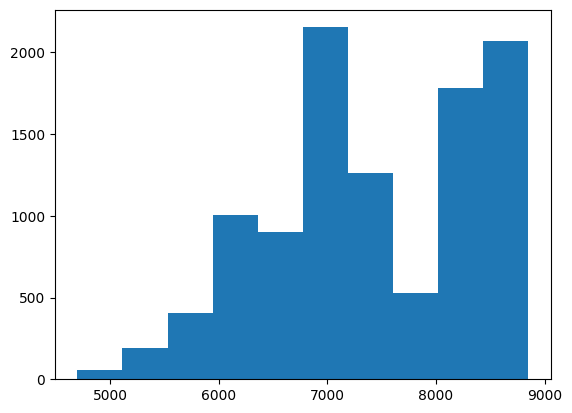

Estadístico=0.9536861363317621, p-value=5.721378590007653e-49
La variable highpoint_metres no sigue una distribución normal


c:\Users\Alberto\Desktop\upgrade\mi_entorno\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10362.



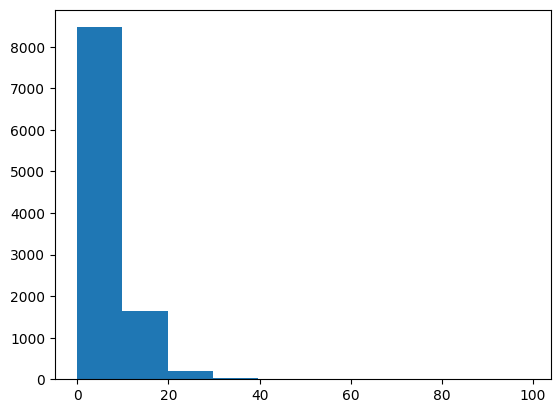

Estadístico=0.7722417589832054, p-value=3.271925509967012e-80
La variable members no sigue una distribución normal


In [147]:
# Vamos a realizar la prueba de Shapiro para conocer si las columnas de 'highpoint_metres' y 'members' siguen o no una distribucion normal.
for columnas in ['highpoint_metres', 'members']:
    plt.hist(expeditions[columnas])
    plt.show()
    stat, p = shapiro(expeditions[columnas])
    print(f'Estadístico={stat}, p-value={p}')
    
    if p < 0.05:
        print(f'La variable {columnas} no sigue una distribución normal')
    else:
        print(f'La variable {columnas} sigue una distribución normal')

### 4.2 Chi-cuadrado

In [148]:
# Comparamos las variables categoricas de 'season' y 'termination_reason' para conocer si verdaderamente hay una relacion significativa entre ambas variables.
tabla_contingencia = pd.crosstab(expeditions['season'], expeditions['termination_reason'])
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Hay una relacion significativa entre la temporada del año y la causa de finalizacion de la expedicion')
else:
    print('No hay una relacion significativa entre la temporada del año y la causa de finalizacion de la expedicion')

Chi2: 560.4315506998506 P-value: 7.935856018242527e-92
Hay una relacion significativa entre la temporada del año y la causa de finalizacion de la expedicion
